##### Afwa Afini - VIE Data Scientist - Kalbe Nutritionals

In [15]:
#Library pengolahan data
import pandas as pd
import numpy as np

#Library visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Library model Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
# load data dan menampilkan data
df = pd.read_csv("../data-source/Dataset CCV 5 - Supervised Learning Regression.csv")
df.head() 

,Day,Diabetasol Coklat 1 kg,Fitbar Multigrain raisin 22 gram,Hydro Coco Original 500 ml,Slim & Fit Milk 312 gr,Daily Sales
0,1,7165158.0,115718.0,747417,7131950.0,20100380
1,2,11091106.0,302774.0,531021,4568946.0,19923983
2,3,3927138.0,150366.0,66812,2321753.0,10688946
3,4,1155500.0,74752.0,436916,NaN,4993264
4,5,6007919.0,370528.0,202243,3764485.0,14853006


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Day                               31 non-null     int64  
 1   Diabetasol Coklat 1 kg            30 non-null     float64
 2   Fitbar Multigrain raisin 22 gram  30 non-null     float64
 3   Hydro Coco Original 500 ml        31 non-null     int64  
 4   Slim & Fit Milk 312 gr            28 non-null     float64
 5   Daily Sales                       31 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 KB


In [18]:
df.describe()

,Day,Diabetasol Coklat 1 kg,Fitbar Multigrain raisin 22 gram,Hydro Coco Original 500 ml,Slim & Fit Milk 312 gr,Daily Sales
count,31.000000,3.000000e+01,30.000000,3.100000e+01,2.800000e+01,3.100000e+01
mean,16.000000,7.650075e+06,203052.833333,5.852296e+05,2.784100e+06,1.452263e+07
std,9.092121,4.719969e+06,119893.843744,3.157644e+05,1.798318e+06,5.938896e+06
min,1.000000,6.946280e+05,56598.000000,3.374900e+04,2.419020e+05,2.847663e+06
25%,8.500000,4.046010e+06,117565.000000,3.251445e+05,1.182336e+06,1.018512e+07
50%,16.000000,7.396085e+06,154139.000000,5.478080e+05,3.124707e+06,1.485301e+07
75%,23.500000,1.143811e+07,251149.750000,8.573490e+05,3.804342e+06,1.964331e+07
max,31.000000,1.802751e+07,479724.000000,1.196453e+06,7.131950e+06,2.537055e+07


In [19]:
df.isna().sum()

Day                                 0
Diabetasol Coklat 1 kg              1
Fitbar Multigrain raisin 22 gram    1
Hydro Coco Original 500 ml          0
Slim & Fit Milk 312 gr              3
Daily Sales                         0
dtype: int64

c:\Users\AfwaAfini\.conda\envs\kalbe_ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

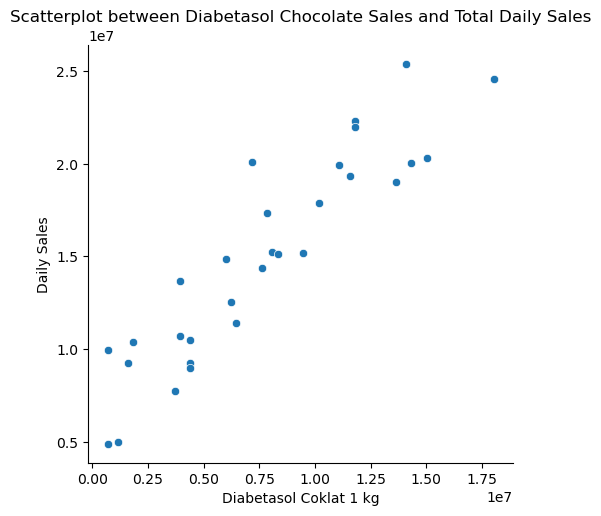

In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# membuat visualisasi sebaran data antara var.dependen (salary) & independen (years) menggunakan grafik scatterplot
plt.figure(figsize=(12,5))
sns.pairplot(df, x_vars=['Diabetasol Coklat 1 kg'], y_vars=['Daily Sales'], height=5, kind='scatter')
plt.xlabel('Diabetasol Coklat 1 kg')
plt.ylabel('Daily Sales')
plt.title('Scatterplot between Diabetasol Chocolate Sales and Total Daily Sales')
plt.show()

In [21]:
df.dropna(subset = 'Diabetasol Coklat 1 kg', inplace = True)

In [22]:
# menyimpan ke var. x sebagai var. independen
X = df['Diabetasol Coklat 1 kg']
X.head()

0     7165158.0
1    11091106.0
2     3927138.0
3     1155500.0
4     6007919.0
Name: Diabetasol Coklat 1 kg, dtype: float64

In [23]:
# menyimpan ke var. y sebagai var. dependen
y = df['Daily Sales']
y.head()

0    20100380
1    19923983
2    10688946
3     4993264
4    14853006
Name: Daily Sales, dtype: int64

In [24]:
# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [25]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


In [26]:
X_train = X_train.reshape(X_train.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],1)

In [27]:
# menyesuaikan garis regresi dengan sebaran data (fit)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
# model melakukan prediksi
y_pred = lr.predict(X_test)

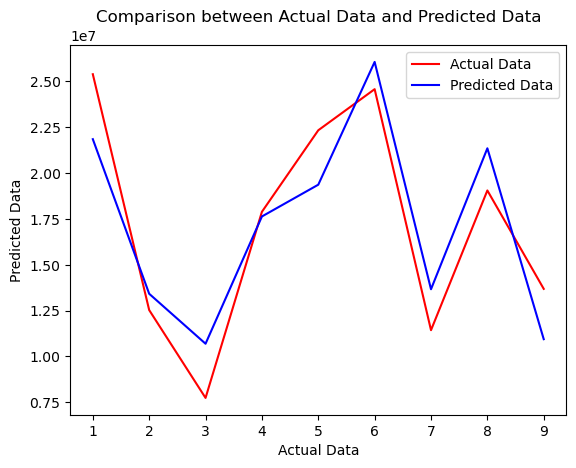

In [29]:
# membuat visualisasi perbandingan
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot (c, y_pred, color='b', linestyle='-', label='Predicted Data')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.title('Comparison between Actual Data and Predicted Data')
plt.show()

In [30]:
# metriks untuk evaluasi model
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
# perhitungan Mean square error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) :', mse)

Mean Squared Error (MSE) : 5646943705294.958


In [32]:
# Intercept and coeff of the line
print('Intercept of the model :', lr.intercept_)
print('Coefficient of the line :', lr.coef_)

Intercept of the model : 6728389.623898853
Coefficient of the line : [1.0712553]


berhasil membuat model regresi linear dengan persamaan:

y = 1.07x + 6728389.62